# **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


(60000, 28, 28)


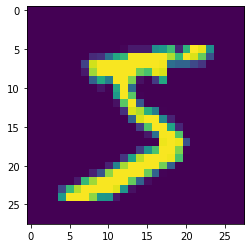

In [0]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[5])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(64, 3, activation='relu'))
model.add(Convolution2D(128, 3, activation='relu'))
model.add(Convolution2D(256, 3, activation='relu'))
model.add(Convolution2D(10, 1, activation='relu'))
model.add(Convolution2D(10, 7))
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """


In [0]:
model.summary()

Model: "sequential_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_114 (Conv2D)          (None, 26, 26, 32)        320       
_________________________________________________________________
activation_57 (Activation)   (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_115 (Conv2D)          (None, 11, 11, 64)        18496     
_________________________________________________________________
conv2d_116 (Conv2D)          (None, 9, 9, 128)         73856     
_________________________________________________________________
conv2d_117 (Conv2D)          (None, 7, 7, 256)         295168    
_________________________________________________________________
conv2d_118 (Conv2D)          (None, 7, 7, 10)        

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [0]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 32s 525us/step - loss: 0.1374 - acc: 0.9576
Epoch 2/10
60000/60000 [==============================] - 30s 502us/step - loss: 0.0481 - acc: 0.9852
Epoch 3/10
60000/60000 [==============================] - 30s 501us/step - loss: 0.0351 - acc: 0.9892
Epoch 4/10
60000/60000 [==============================] - 30s 504us/step - loss: 0.0275 - acc: 0.9910
Epoch 5/10
60000/60000 [==============================] - 30s 507us/step - loss: 0.0221 - acc: 0.9929
Epoch 6/10
60000/60000 [==============================] - 30s 503us/step - loss: 0.0178 - acc: 0.9942
Epoch 7/10
60000/60000 [==============================] - 30s 508us/step - loss: 0.0150 - acc: 0.9950
Epoch 8/10
60000/60000 [==============================] - 30s 504us/step - loss: 0.0138 - acc: 0.9956
Epoch 9/10
60000/60000 [==============================] - 30s 502us/step - loss: 0.0106 - acc: 0.9965
Epoch 10/10
60000/60000 [==============================] - 30s 501us/step - loss: 

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [0]:
print(score)

[0.035338936169623504, 0.9909]


In [0]:
y_pred = model.predict(X_test)

In [0]:
print(y_pred[:9])
print(y_test[:9])

[[7.70692538e-12 5.93862237e-10 4.56429294e-09 3.82737113e-07
  2.14442591e-12 9.92121229e-12 1.29809777e-19 9.99999642e-01
  2.38871833e-09 1.26133832e-08]
 [2.09454960e-08 4.14716510e-08 9.99993324e-01 3.49386031e-09
  3.18890159e-15 1.67049888e-10 6.58470890e-06 1.19632469e-14
  1.14353127e-09 8.61447849e-13]
 [9.56175063e-06 9.99567568e-01 7.96973254e-05 4.74602970e-08
  3.14022065e-04 1.40729094e-06 7.45391333e-07 1.13699325e-05
  1.54702029e-05 9.98605429e-08]
 [1.00000000e+00 1.57964177e-13 2.61459920e-08 1.74264613e-11
  8.70990346e-12 5.64346347e-10 3.42991697e-08 1.21348898e-09
  4.84527307e-10 3.89072496e-10]
 [1.87754267e-07 6.23825575e-11 2.42643905e-09 2.50130050e-09
  9.99998689e-01 3.13868159e-12 4.63796779e-10 1.09822537e-07
  2.22549431e-07 7.80556604e-07]
 [1.48670040e-06 9.99158859e-01 1.22472911e-05 2.11419415e-08
  7.95965389e-05 1.67984965e-07 3.44992053e-08 7.41443597e-04
  5.93003278e-06 2.27459054e-07]
 [6.92289542e-13 6.35833386e-09 1.41246005e-07 4.50876803e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()

KeyError: ignored